# Homework 3: Python Fundamentals

## 1. NumPy Operations


In [1]:
import numpy as np
import time

print("NumPy arrays")
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([10, 20, 30, 40, 50])
large_arr = np.random.randint(1, 100, size=1000000)

print(f"array 1: {arr1}")
print(f"array 2: {arr2}")
print(f"array shape: {large_arr.shape}")
print(f"array sample (first 10): {large_arr[:10]}")


NumPy arrays
array 1: [1 2 3 4 5]
array 2: [10 20 30 40 50]
array shape: (1000000,)
array sample (first 10): [59 52 39 77 36 56  3 42 80 52]


### Elementwise Operations


In [2]:

print("=== ELEMENTWISE OPERATIONS ===")


print("\n1. Basic Arithmetic:")
print(f"arr1 + arr2 = {arr1 + arr2}")
print(f"arr1 * arr2 = {arr1 * arr2}")
print(f"arr1 ** 2 = {arr1 ** 2}")
print(f"arr2 / 2 = {arr2 / 2}")

print("\n2. Mathematical Functions:")
print(f"sqrt(arr1) = {np.sqrt(arr1)}")
print(f"exp(arr1) = {np.exp(arr1)}")
print(f"log(arr2) = {np.log(arr2)}")
print(f"sin(arr1) = {np.sin(arr1)}")

print("\n3. Boolean Operations:")
print(f"arr1 > 3: {arr1 > 3}")
print(f"arr2 == 30: {arr2 == 30}")
print(f"Elements in arr1 > 3: {arr1[arr1 > 3]}")


=== ELEMENTWISE OPERATIONS ===

1. Basic Arithmetic:
arr1 + arr2 = [11 22 33 44 55]
arr1 * arr2 = [ 10  40  90 160 250]
arr1 ** 2 = [ 1  4  9 16 25]
arr2 / 2 = [ 5. 10. 15. 20. 25.]

2. Mathematical Functions:
sqrt(arr1) = [1.         1.41421356 1.73205081 2.         2.23606798]
exp(arr1) = [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
log(arr2) = [2.30258509 2.99573227 3.40119738 3.68887945 3.91202301]
sin(arr1) = [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]

3. Boolean Operations:
arr1 > 3: [False False False  True  True]
arr2 == 30: [False False  True False False]
Elements in arr1 > 3: [4 5]


### Performance Comparison: Loop vs Vectorized Operations


In [ ]:

def square_with_loop(arr):
    result = []
    for element in arr:
        result.append(element ** 2)
    return result

def square_with_comprehension(arr):
    return [x ** 2 for x in arr]

# Test array
test_array = np.random.randint(1, 100, size=100000)

print("=== PERFORMANCE COMPARISON ===")
print(f"Array size: {len(test_array):,} elements")
print()

=== PERFORMANCE COMPARISON ===
Array size: 100,000 elements



In [4]:
# Method 1: Python loop
print("1. Python Loop Method:")
start_time = time.time()
result_loop = square_with_loop(test_array)
loop_time = time.time() - start_time
print(f"   Time taken: {loop_time:.4f} seconds")

# Method 2: List comprehension
print("\n2. List Comprehension Method:")
start_time = time.time()
result_comprehension = square_with_comprehension(test_array)
comprehension_time = time.time() - start_time
print(f"   Time taken: {comprehension_time:.4f} seconds")

# Method 3: NumPy vectorized operation
print("\n3. NumPy Vectorized Method:")
start_time = time.time()
result_numpy = test_array ** 2
numpy_time = time.time() - start_time
print(f"   Time taken: {numpy_time:.4f} seconds")

1. Python Loop Method:
   Time taken: 0.0442 seconds

2. List Comprehension Method:
   Time taken: 0.0202 seconds

3. NumPy Vectorized Method:
   Time taken: 0.0010 seconds


In [5]:
import pandas as pd


df = pd.read_csv('../data/starter_data.csv')

print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes

First 5 rows:
  category  value        date
0        A     10  2025-08-01
1        B     15  2025-08-02
2        A     12  2025-08-03
3        B     18  2025-08-04
4        C     25  2025-08-05


In [6]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000


In [7]:
print("Grouped by Category:")
category_stats = df.groupby('category')['value'].agg(['count', 'mean', 'std', 'min', 'max'])
print(category_stats)

Grouped by Category:
          count       mean       std  min  max
category                                      
A             4  11.500000  1.290994   10   13
B             3  15.666667  2.081666   14   18
C             3  27.666667  2.516611   25   30


In [8]:
category_stats.to_csv('../data/processed/summary.csv')
print("Summary statistics saved to data/processed/summary.csv")

Summary statistics saved to data/processed/summary.csv


Matplotlib is building the font cache; this may take a moment.


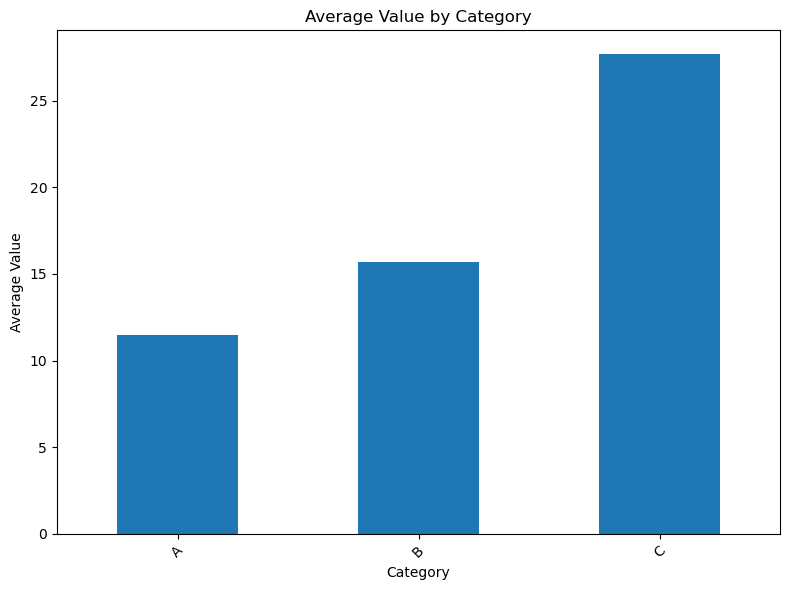

Plot saved to data/processed/category_plot.png


In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
category_stats['mean'].plot(kind='bar')
plt.title('Average Value by Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../data/processed/category_plot.png')
plt.show()
print("Plot saved to data/processed/category_plot.png")

In [10]:
import sys
sys.path.append('../src')
from utils import get_summary_stats

print("Using utility function from utils.py:")
summary = get_summary_stats(df, 'category', 'value')
print(summary)

Using utility function from utils.py:
          count       mean       std  min  max
category                                      
A             4  11.500000  1.290994   10   13
B             3  15.666667  2.081666   14   18
C             3  27.666667  2.516611   25   30
